# Pymaceuticals Inc.
---

### Analysis

In this data analysis, we investigated a mouse study dataset to gain insights into the effectiveness of various treatment regimens on tumor volume. We performed data cleaning, summary statistics calculation, data visualization, and statistical analysis to understand the relationships between variables and draw meaningful conclusions.

#### Data Cleaning and Exploration
This initial phase of the analysis involved data cleaning and exploration. The mouse data and study were merged into a single DataFrame to consolidate relevant information.
Duplicate data was identified based on unique identifiers and inconsistencies were resolved.
The cleaned dataset comprised information on mouse characteristics, treatment regimens, tumor volume and other relevant data points.

#### Summary Statistics
Summary statistics were calculated to gain insights into the tumor volume distribution across different drug regimens.
Mean, median, variance, standard deviation and standard error were computed for each regimen. The resulting statistics table provided a comprehensive overview of the tumor volume characteristics for each drug regimen.

#### Data Visualization
Visualization played a key role in understanding the dataset and communicating the findings.
Bar charts were used to visualize the total number of data points for each drug regimen, offering a clear comparison among the treatements.
Pie charts were used to illustrate the gender distributuion among the mice, helping to provide an overview of the study's composition. Box plots helped in understanding the distribution and potential outliers in tumor volume across different treatment groups.

#### Statistical Analysis
Correlation analysis was conducted to evaluate the relationshipo between mouse weight and avegrage observed tumor volume for the Capomulin regiment.
Linear regreassion analysis was performed to model the relationship between mouse weight and timor volume, and to assess the signficance of the regression parameters.

Based on my analysis, the following key findings were observed

- The dataset contained 248 unique mice
- The most promising regimens were Capomulin, Ramicane, Infubino and Ceftamin, which showed varying levels of effectiveness in reducing tumor volume.
- The Capomulin regimen showed a strong negative correlation between mouse weight and average tumor volume, indicating that heavier mice tended to have larger tumor volumes.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_data = study_results.join(mouse_metadata.set_index('Mouse ID'), on='Mouse ID')

# Display the data table for preview

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.loc[merged_data['Mouse ID'].isin(duplicate_mice)]

duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'] != 'g989']

cleaned_data.to_csv('cleaned_data.csv', index=False)
cleaned_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
num_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).mean()
median = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).median()
var = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).var()
std = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).std()
sem = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Assemble the resulting series into a single summary DataFrame.
summary_stat



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])


summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

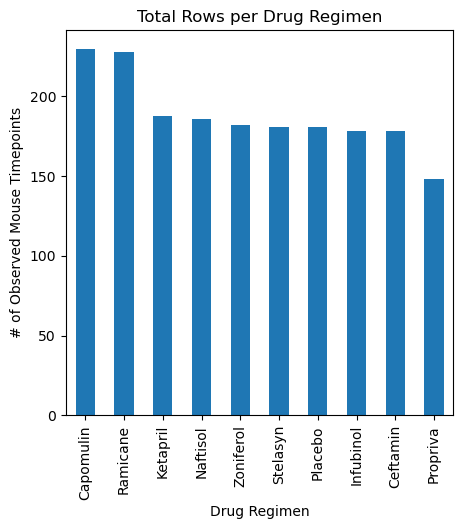

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_count = cleaned_data['Drug Regimen'].value_counts()

regimen_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title='Total Rows per Drug Regimen',figsize=(5, 5))
plt.show()

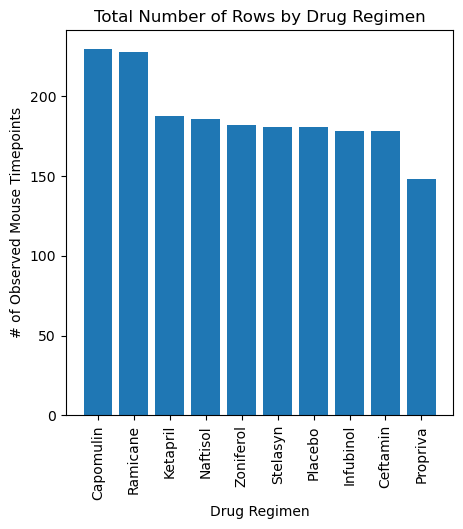

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(5, 5))
plt.bar(regimen_count.index, regimen_count.values)
plt.title('Total Number of Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

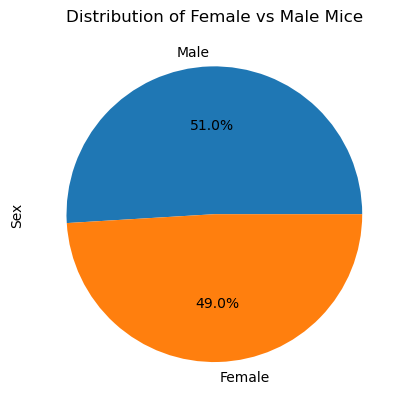

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count = cleaned_data["Sex"].value_counts()
plt.title('Distribution of Female vs Male Mice')
mice_count.plot.pie(autopct='%1.1f%%')
plt.show()

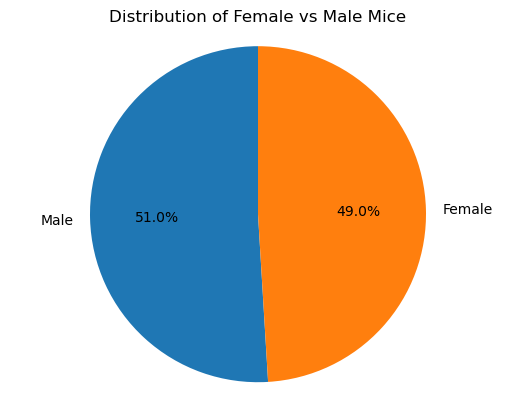

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_count, labels=mice_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

promising_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
promising_data = cleaned_data[cleaned_data['Drug Regimen'].isin(promising_regimens)]

# Start by getting the last (greatest) timepoint for each mouse

final_timepoints = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(cleaned_data, final_timepoints, on=("Mouse ID", "Timepoint"), how="right")

final_tumor_volume.head(250)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset    
    # Determine outliers using upper and lower bounds

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_data = {}

for drug in treatment_names:
    drug_rows = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']== drug]
    volumes = drug_rows['Tumor Volume (mm3)']
    tumor_volume_data[drug] = volumes
    quartile_1 = volumes.quantile(0.25)
    quartile_3 = volumes.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"Drug: {drug}")
    if len(outliers) == 0:
        print("No outliers found.")
    else:
       print("Potential outliers:")
    print(outliers)
    print()
    

Drug: Capomulin
No outliers found.
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug: Ramicane
No outliers found.
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug: Infubinol
Potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Drug: Ceftamin
No outliers found.
Series([], Name: Tumor Volume (mm3), dtype: float64)



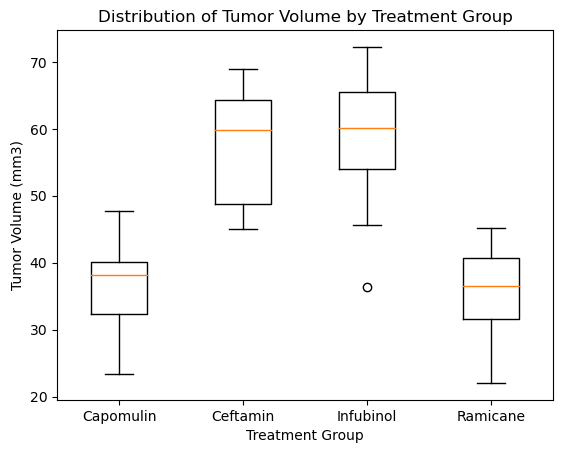

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

grouped_data = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

treatment_names = grouped_data.index.tolist()

data = grouped_data.tolist()

plt.boxplot(data, labels=treatment_names)

plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.show()

## Line and Scatter Plots

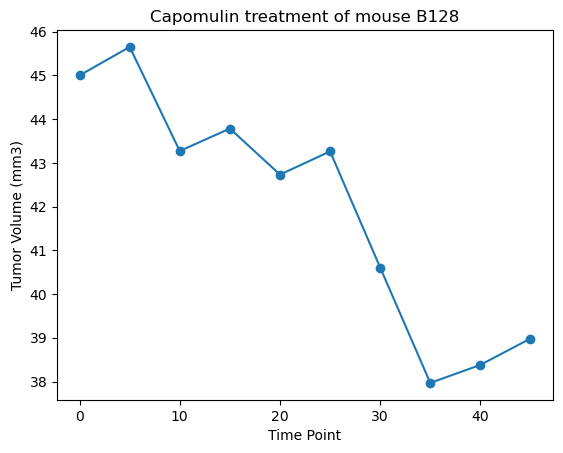

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 'b128')]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Capomulin treatment of mouse B128')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


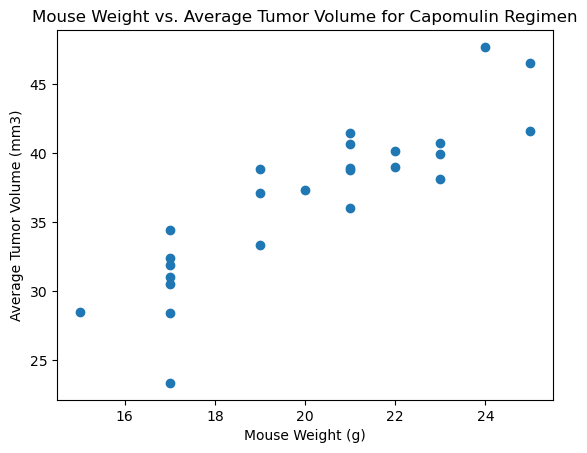

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

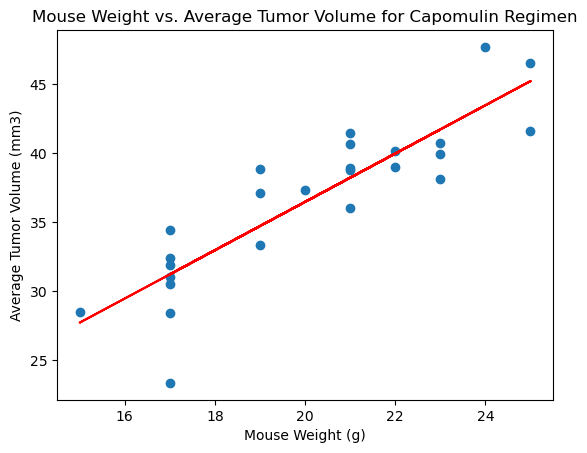

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
correlation = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]
coefficients = np.polyfit(mouse_weight, average_tumor_volume, 1)
slope = coefficients[0]
intercept = coefficients[1]

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.plot(mouse_weight, slope * mouse_weight + intercept, 'r')

plt.show()